In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
%pwd

'c:\\Users\\Swapnadip Paul\\Desktop\\Loan Approval'

In [12]:
df = pd.read_csv("./Dataset/Loan.csv")

In [13]:
df

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51996,Female,47,Divorced,1,High School,Self-Employed,Professional,Own,Urban,...,15723,60,Home,12.52,Secured,Yes,2,26,0.61,1
51996,51997,Male,25,Married,3,High School,Self-Employed,Freelancer,Rent,Urban,...,21209,237,Vehicle,5.21,Unsecured,No,8,26,0.04,1
51997,51998,Female,48,Married,0,High School,Unemployed,Business,Rent,Urban,...,10540,60,Education,10.60,Unsecured,No,8,24,0.31,0
51998,51999,Female,48,Divorced,1,High School,Employed,Business,Own,Urban,...,16765,32,Vehicle,8.11,Secured,Yes,3,12,0.34,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

In [15]:
df.describe()

,Applicant_ID,Age,Dependents,Annual_Income,Monthly_Expenses,Credit_Score,Existing_Loans,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_History,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,26000.500000,38.898385,1.498000,83588.474404,2748.064885,678.089019,0.997865,24939.087962,14984.864923,0.198596,21102.765481,125.827019,9.253494,4.503923,17.031808,0.500204,0.641654
std,15011.251336,10.553928,1.118077,35720.851522,1295.678763,159.990367,0.815586,14407.886552,8663.404305,0.398947,8224.940906,65.509959,3.318356,2.872721,7.212011,0.289939,0.479519
min,1.000000,18.000000,0.000000,20009.000000,500.000000,300.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,3.500000,0.000000,5.000000,0.000000,0.000000
25%,13000.750000,31.000000,0.000000,55564.000000,1636.000000,553.000000,0.000000,12498.000000,7511.750000,0.000000,16941.750000,69.000000,6.400000,2.000000,11.000000,0.250000,0.000000
50%,26000.500000,38.000000,1.000000,78839.000000,2739.000000,742.000000,1.000000,24964.000000,14984.500000,0.000000,21039.000000,126.000000,9.240000,5.000000,17.000000,0.500000,1.000000
75%,39000.250000,45.000000,2.000000,114226.000000,3866.000000,796.000000,2.000000,37399.500000,22432.250000,0.000000,25809.000000,182.000000,12.140000,7.000000,23.000000,0.750000,1.000000
max,52000.000000,69.000000,3.000000,149998.000000,4999.000000,849.000000,2.000000,49999.000000,29998.000000,1.000000,44848.000000,239.000000,15.000000,9.000000,29.000000,1.000000,1.000000


In [17]:
df.isna().sum()*100/len(df) ##Percentage of missing values in each column

Applicant_ID                  0.0
Gender                        0.0
Age                           0.0
Marital_Status                0.0
Dependents                    0.0
Education                     0.0
Employment_Status             0.0
Occupation_Type               0.0
Residential_Status            0.0
City/Town                     0.0
Annual_Income                 0.0
Monthly_Expenses              0.0
Credit_Score                  0.0
Existing_Loans                0.0
Total_Existing_Loan_Amount    0.0
Outstanding_Debt              0.0
Loan_History                  0.0
Loan_Amount_Requested         0.0
Loan_Term                     0.0
Loan_Purpose                  0.0
Interest_Rate                 0.0
Loan_Type                     0.0
Co-Applicant                  0.0
Bank_Account_History          0.0
Transaction_Frequency         0.0
Default_Risk                  0.0
Loan_Approval_Status          0.0
dtype: float64

In [18]:
df.head()

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [20]:
df.replace({
  "Gender": {"Male": 0, "Female": 1},
  "Marital_Status": {"Single": 0, "Married": 1, "Divorced": 2},
  "Education": {"High School": 0, "Graduate": 1, "Postgraduate": 2},
  "Employment_Status": {"Unemployed": 0, "Employed": 1, "Self-Employed": 2},
  "Occupation_Type": {"Business": 0, "Freelancer": 1, "Professional": 2, "Salaried": 3},
  "Residential_Status": {"Rent": 0, "Own": 1, "Other": 2},
  "City/Town": {"Rural": 0, "Suburban": 1, "Urban": 2},
  "Loan_Purpose": {"Education": 0, "Home": 1, "Personal": 2, "Vehicle": 3},
  "Loan_Type": {"Unsecured": 0, "Secured": 1},
  "Co-Applicant": {"Yes": 0, "No": 1},
}, inplace=True)

In [21]:
df

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,1,25,1,2,1,1,0,1,2,...,24535,209,1,4.27,1,0,8,20,0.81,1
1,2,0,36,1,2,0,1,0,1,1,...,8288,33,1,14.78,0,0,9,9,0.17,0
2,3,0,43,0,0,2,2,1,1,2,...,10308,159,3,12.33,1,0,7,27,0.25,0
3,4,1,28,1,0,0,2,1,0,1,...,33937,39,2,8.77,1,1,9,16,0.27,1
4,5,1,32,0,0,1,1,3,0,1,...,23360,34,1,9.04,0,1,1,17,0.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51996,1,47,2,1,0,2,2,1,2,...,15723,60,1,12.52,1,0,2,26,0.61,1
51996,51997,0,25,1,3,0,2,1,0,2,...,21209,237,3,5.21,0,1,8,26,0.04,1
51997,51998,1,48,1,0,0,0,0,0,2,...,10540,60,0,10.60,0,1,8,24,0.31,0
51998,51999,1,48,2,1,0,1,0,1,2,...,16765,32,3,8.11,1,0,3,12,0.34,0


In [22]:
def train_test_split_and_features(df):
    y = df["Loan_Approval_Status"]
    x = df.drop(columns=["Applicant_ID", "Loan_Approval_Status"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features

In [23]:
x_train, x_test, y_train, y_test, features = train_test_split_and_features(df)

   Gender  Age  Marital_Status  Dependents  Education  Employment_Status  \
0       1   25               1           2          1                  1   
1       0   36               1           2          0                  1   
2       0   43               0           0          2                  2   
3       1   28               1           0          0                  2   
4       1   32               0           0          1                  1   

   Occupation_Type  Residential_Status  City/Town  Annual_Income  ...  \
0                0                   1          2         139901  ...   
1                0                   1          1          21162  ...   
2                1                   1          2          27815  ...   
3                1                   0          1         137853  ...   
4                3                   0          1          81753  ...   

   Loan_History  Loan_Amount_Requested  Loan_Term  Loan_Purpose  \
0             0                  2453

In [37]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest = RandomForestClassifier(
        n_estimators=300,
        random_state=0,
        max_depth=10,
        min_samples_split=5,
        max_features=0.5,
    )
    
    model = random_forest.fit(x_train, y_train)
    predictions = random_forest.predict(x_test)
    
    conf_matrix = confusion_matrix(y_test, predictions)
    acc_score = accuracy_score(y_test, predictions)
    
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    print(f"Accuracy of Random Forest: {acc_score * 100:.2f}% \n")
    print(classification_report(y_test, predictions))
    
    return model

In [38]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

Confusion Matrix:
[[2564 1090]
 [ 473 6273]]


Accuracy of Random Forest: 84.97% 

              precision    recall  f1-score   support

           0       0.84      0.70      0.77      3654
           1       0.85      0.93      0.89      6746

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400



In [39]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

In [34]:
importances

,importance,feature
15,0.000513,Loan_History
20,0.000624,Loan_Type
0,0.000652,Gender
21,0.000765,Co-Applicant
5,0.001075,Employment_Status
8,0.001080,City/Town
4,0.001109,Education
12,0.001155,Existing_Loans
2,0.001157,Marital_Status
7,0.001169,Residential_Status


<BarContainer object of 25 artists>

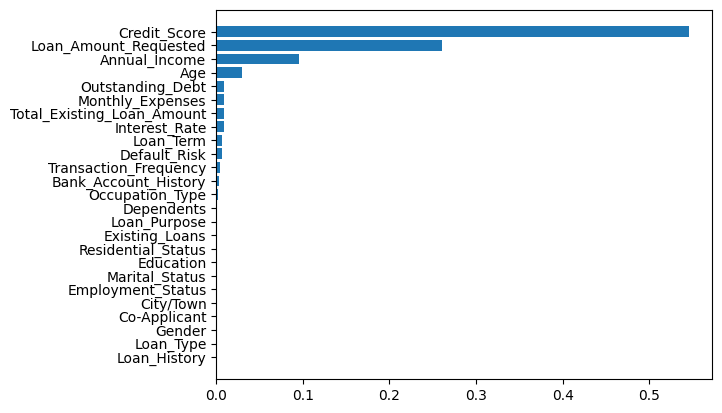

In [41]:
plt.barh(importances.feature, importances.importance)